In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/AI_Project"

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/AI_Project/Files/Vehicle-Number-Plate-detection-Using-Tensorflow'
/content


# Download Car-License-Plate-Detection Dataset from Kaggle into Google Colab 

### Step 1: Mount your drive with colab
Already mounted, code on first cell

In [ ]:
# Project Directory
%cd "/content/drive/MyDrive/Colab Notebooks/AI_Project"
#Dataset Directory
%cd "/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset"
!ls -a

/content/drive/MyDrive/Colab Notebooks/AI_Project
/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset
annotations  car-plate-detection.zip  images  kaggle.json


## Step 2: Download your kaggle API credentials (guide is available on this [link](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/) )
I have uploaded kaggle.json and its path is "/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/kaggle.json"
If you have to download the dataset from kaggle must you must have yor own kaggle API credentials

In [ ]:
# path of dataset folder
# /content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset

In [ ]:
! pip install kaggle

### Make .kaggle directory  on your root directory if it doesn't exists

In [ ]:
! mkdir /root/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


### Copy the kaggle.json API credential file into "/root/.kaggle/" directory

In [ ]:
! cp "/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/kaggle/kaggle.json" /root/.kaggle/

### Change permissions of the file directory

In [ ]:
! chmod 600 /root/.kaggle/

### Download the dataset

In [ ]:
! kaggle datasets download andrewmvd/car-plate-detection

 95% 193M/203M [00:01<00:00, 188MB/s]
100% 203M/203M [00:01<00:00, 188MB/s]


In [ ]:
!ls

car-plate-detection.zip  kaggle  kaggle.json


In [ ]:
! unzip car-plate-detection.zip

In [ ]:
!ls -a

annotations  car-plate-detection.zip  images  kaggle.json


# Import Dataset and preprocess

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob

In [ ]:
IMAGE_SIZE = 224

In [ ]:
img_dir = "/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/images" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort() #We sort the images in alphabetical order to match them to the xml files containing the annotations of the bounding boxes
X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))

In [ ]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/annotations'
text_files = ['/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/annotations/'+f for f in sorted(os.listdir(path))]
y=[]
for i in text_files:
    y.append(resizeannotation(i))

In [ ]:
len(y)

433

In [ ]:
y[0]

[187, 144, 101, 104]

In [ ]:
print(np.array(X).shape)
print(np.array(y).shape)

(447, 224, 224, 3)
(433, 4)


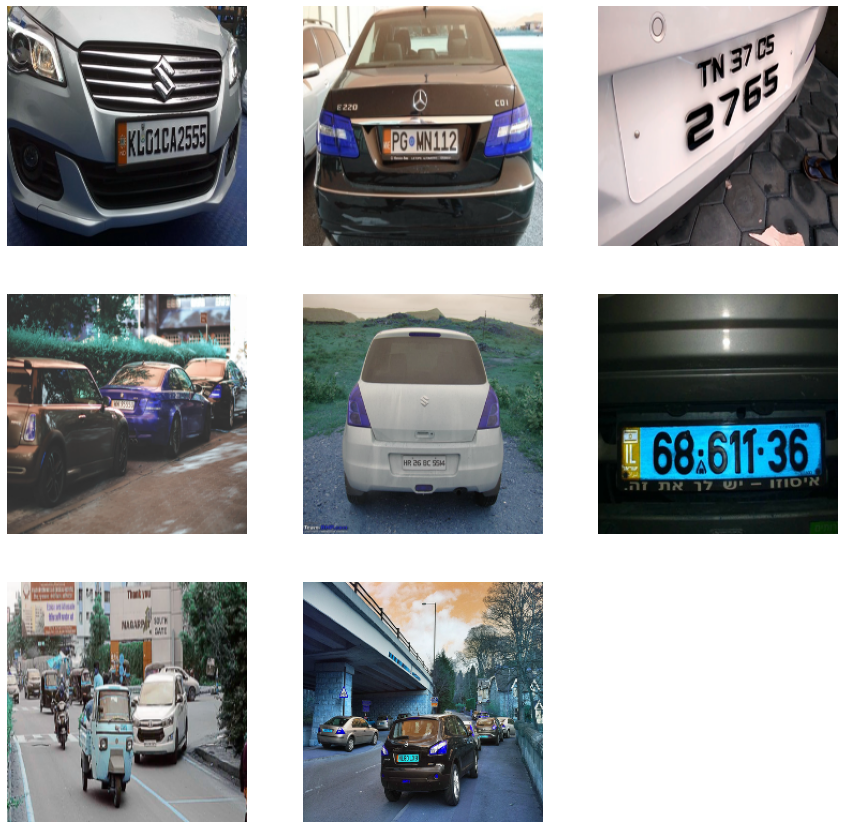

In [ ]:
plt.figure(figsize=(15,15))
for i in range(0,8) :
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(X[i], cmap = 'jet')

### Plotting the resized bounding boxes of license plate on the top of image

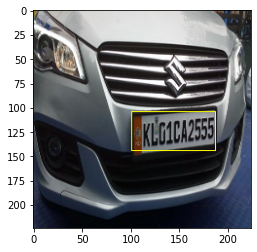

In [ ]:
#Example with the first image of the dataset
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(255,255,0))
plt.imshow(image)
plt.show()


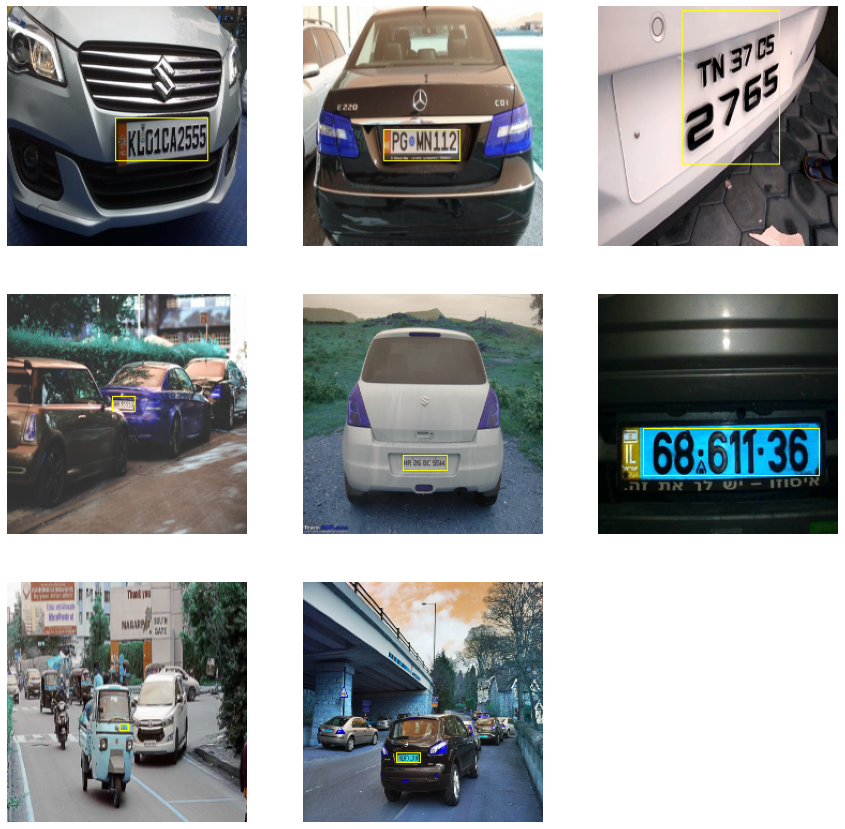

In [ ]:
plt.figure(figsize=(15,15))
for i in range(0,8) :
    plt.subplot(3,3,i+1)
    plt.axis('off')
    image = cv2.rectangle(X[i],(y[i][0],y[i][1]),(y[i][2],y[i][3]),(255,255,0))
    #plt.imshow(X[i], cmap = 'jet')
    plt.imshow(image)